## Multiple Linear Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('multiple_linear_regression.csv')

In [4]:
df.shape

(200, 4)

In [5]:
df.head(2)

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isna().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

In [8]:
df.duplicated().sum()

0

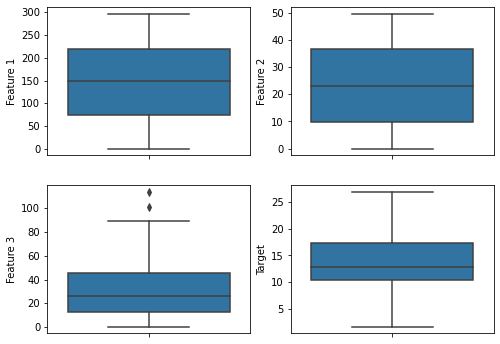

In [9]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.boxplot(data = df, y='Feature 1')
plt.subplot(2,2,2)
sns.boxplot(data = df, y='Feature 2')
plt.subplot(2,2,3)
sns.boxplot(data = df, y='Feature 3')
plt.subplot(2,2,4)
sns.boxplot(data = df, y='Target')
plt.show()

In [10]:
df.columns

Index(['Feature 1', 'Feature 2', 'Feature 3', 'Target'], dtype='object')

In [11]:
x_col = ['Feature 1', 'Feature 2', 'Feature 3']
y_col = ['Target']

In [12]:
x = df[x_col]
y = df[y_col]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.25,
                                                   random_state=13)

In [14]:
x_train.shape, y_train.shape

((150, 3), (150, 1))

In [15]:
x_test.shape, y_test.shape

((50, 3), (50, 1))

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(x,y)

LinearRegression()

In [18]:
y_pred = lr.predict(x_test)

In [19]:
msr  = mean_squared_error(y_pred,y_test)
msr

2.023604181842751

In [20]:
msr  = mean_squared_error(y_test,y_pred)
msr

2.023604181842751

In [21]:
lr.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

In [22]:
lr.intercept_

array([2.93888937])

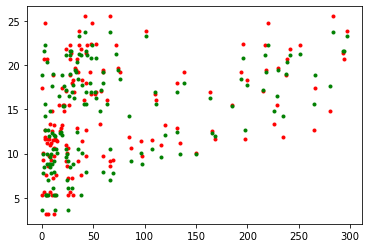

In [23]:
plt.plot(x_test,y_test,'.',color='red')
plt.plot(x_test,y_pred,'.',color='green')
plt.show()

## OLS Model ( without constants )

### `1 . with all 3 features`

In [25]:
import statsmodels.api as sm

In [34]:
model1 = sm.OLS(y_train,x_train)
result1 = model1.fit()

In [35]:
y_pred = result1.predict(x_test)
msr = mean_squared_error(y_pred,y_test)
msr

3.6762602637842887

In [47]:
result1.params

Feature 1    0.054323
Feature 2    0.216325
Feature 3    0.019579
dtype: float64

In [36]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Target   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              2481.
Date:                Sat, 25 May 2024   Prob (F-statistic):                   1.23e-125
Time:                        07:02:45   Log-Likelihood:                         -320.14
No. Observations:                 150   AIC:                                      646.3
Df Residuals:                     147   BIC:                                      655.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Feature 1      0.0543      0.002     35.588      0.000       0.051       0.057
Feature 2      0.2163      0.011     19.544      0.000       0.194       0.238
Feature 3      0.0196      0.008      2.381      0.019       0.003       0.036
==============================================================================
Omnibus:                        7.377   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                8.317
Skew:                          -0.359   Prob(JB):                       0.0156
Kurtosis:                       3.904   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `2 .  Dropping last column , using first 2 features`

In [38]:
x_train_dropped = x_train.drop('Feature 3',axis=1)

In [39]:
model2 = sm.OLS(y_train,x_train_dropped)
result2 = model2.fit()

In [41]:
x_test_dropped = x_test.drop('Feature 3',axis=1)

In [42]:
y_pred_dropped = result2.predict(x_test_dropped)
msr2 = mean_squared_error(y_pred_dropped,y_test)
msr2

3.6866890797650513

In [44]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Target   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              3604.
Date:                Sat, 25 May 2024   Prob (F-statistic):                   2.92e-126
Time:                        07:08:29   Log-Likelihood:                         -322.98
No. Observations:                 150   AIC:                                      650.0
Df Residuals:                     148   BIC:                                      656.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Feature 1      0.0553      0.001     37.087      0.000       0.052       0.058
Feature 2      0.2324      0.009     26.133      0.000       0.215       0.250
==============================================================================
Omnibus:                        7.088   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.029   Jarque-Bera (JB):               10.086
Skew:                          -0.229   Prob(JB):                      0.00645
Kurtosis:                       4.185   Cond. No.                         8.74
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Final Result ( without adding constants)

#### `1. with all 3 columns`
msr : 3.6762602637842887 <br>
Prob (F-statistic):	1.23e-125 <br>
params :
    <br>
Feature 1    0.054323 <br>
Feature 2    0.216325 <br>
Feature 3    0.019579 <br>
dtype: float64 <br>

<hr>

#### `2. with  first 2 columns`

msr2 : 3.6866890797650513 <br>
Prob (F-statistic):	2.92e-126 <br>
params
  <br>
Feature 1    0.055315 <br>
Feature 2    0.232445 <br>
dtype: float64 <br>

## OLS Model ( With Constants)

### `1. with all 3 columns`

In [51]:
x_train_constant = sm.add_constant(x_train)
x_test_constant = sm.add_constant(x_test)

In [52]:
model3 = sm.OLS(y_train,x_train_constant)
result3 = model3.fit()

In [56]:
y_pred_3 = result3.predict(x_test_constant)
msr3 = mean_squared_error(y_pred_3,y_test)
msr3

2.0963870527500013

In [58]:
result3.params

const        2.939489
Feature 1    0.046216
Feature 2    0.184086
Feature 3   -0.001799
dtype: float64

In [59]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     361.1
Date:                Sat, 25 May 2024   Prob (F-statistic):           2.56e-67
Time:                        07:21:58   Log-Likelihood:                -295.90
No. Observations:                 150   AIC:                             599.8
Df Residuals:                     146   BIC:                             611.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9395      0.394      7.464      0.000       2.161       3.718
Feature 1      0.0462      0.002     27.242      0.000       0.043       0.050
Feature 2      0.1841      0.010     17.718      0.000       0.164       0.205
Feature 3     -0.0018      0.008     -0.237      0.813      -0.017       0.013
==============================================================================
Omnibus:                       47.653   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.309
Skew:                          -1.334   Prob(JB):                     4.10e-25
Kurtosis:                       6.293   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `2. Dropped last column, using first 2 columns`

In [61]:
x_train_drop_constant = x_train_constant.drop('Feature 3',axis=1)
x_test_drop_constant = x_test_constant.drop('Feature 3',axis=1)

In [62]:
model4 = sm.OLS(y_train,x_train_drop_constant)
result4 = model4.fit()

In [63]:
y_pred_4 = result4.predict(x_test_drop_constant)
msr4 = mean_squared_error(y_pred_4,y_test)
msr4

2.093289031332054

In [68]:
result4.params

const        2.904169
Feature 1    0.046235
Feature 2    0.183203
dtype: float64

In [66]:
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     545.2
Date:                Sat, 25 May 2024   Prob (F-statistic):           9.98e-69
Time:                        07:26:30   Log-Likelihood:                -295.93
No. Observations:                 150   AIC:                             597.9
Df Residuals:                     147   BIC:                             606.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9042      0.363      7.990      0.000       2.186       3.622
Feature 1      0.0462      0.002     27.373      0.000       0.043       0.050
Feature 2      0.1832      0.010     18.945      0.000       0.164       0.202
==============================================================================
Omnibus:                       47.081   Durbin-Watson:                   2.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.623
Skew:                          -1.329   Prob(JB):                     2.59e-24
Kurtosis:                       6.212   Cond. No.                         423.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Final Result ( with adding constants)

#### `1. with all 3 columns`

msr3 : 2.0963870527500013 <br>
Prob (F-statistic):	2.56e-67 <br>
 <br>
result3.params <br>
const        2.939489 <br>
Feature 1    0.046216 <br>
Feature 2    0.184086 <br>
Feature 3   -0.001799 <br>
dtype: float64 <br>

<hr>

#### `2. with  first 2 columns`

msr4 : 2.093289031332054 <br> 
Prob (F-statistic):	9.98e-69 <br>
<br>
result4.params <br>
const        2.904169 <br>
Feature 1    0.046235 <br>
Feature 2    0.183203 <br> 
dtype: float64 <br>

# Final Report

# 1.  without adding constants

#### `1. with all 3 columns`
msr : 3.6762602637842887 <br>
Prob (F-statistic):	1.23e-125 <br>
params :
    <br>
Feature 1    0.054323 <br>
Feature 2    0.216325 <br>
Feature 3    0.019579 <br>
dtype: float64 <br>

<hr>

#### `2. with  first 2 columns`

msr2 : 3.6866890797650513 <br>
Prob (F-statistic):	2.92e-126 <br>
params
  <br>
Feature 1    0.055315 <br>
Feature 2    0.232445 <br>
dtype: float64 <br>

#### 2. with adding constants

#### `1. with all 3 columns`

msr3 : 2.0963870527500013 <br>
Prob (F-statistic):	2.56e-67 <br>
 <br>
result3.params <br>
const        2.939489 <br>
Feature 1    0.046216 <br>
Feature 2    0.184086 <br>
Feature 3   -0.001799 <br>
dtype: float64 <br>

<hr>

#### `2. with  first 2 columns`

msr4 : 2.093289031332054 <br> 
Prob (F-statistic):	9.98e-69 <br>
<br>
result4.params <br>
const        2.904169 <br>
Feature 1    0.046235 <br>
Feature 2    0.183203 <br> 
dtype: float64 <br>